### Data augmentation techniques for working with few images

The Keras package offers a module which can be used to augment the images when we work with few images. The augmenation works by creating various transformations of the original images in the training dataset, and using those transformations as part of the training set. The images in the validation set should NOT be augmented.
<p>
For more on the technique check out this article: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
<br>
Documentation from Keras on the augmentation: https://keras.io/preprocessing/image/

In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
import os

%matplotlib inline


Using TensorFlow backend.


In [78]:
datagen = ImageDataGenerator(rotation_range = 50,       # 0 - 40 degree range within which to randomly rotate pictures
                             width_shift_range = 0.5,   # Range within which to randomly translate pictures horizontally
                             height_shift_range = 0.5,  # Range within which to randomly translate pictures vertically
                             shear_range = 0.2,         # Shear (stretching) transformations
                             zoom_range = 0.5,          # Randomly zoom within an image
                             #horizontal_flip = True,   # Flip pictures (Boolean)
                             fill_mode = "nearest"      # Method to fill the points outside of the boundaries of the original image
                            )

dir_imgs = "C:/Users/bre49823/Google Drive/Brikz/images/"

read_img = load_img(dir_imgs + "train/non_brikz/119.jpg")
x = img_to_array(read_img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size = 1,
                          save_to_dir = (dir_imgs + "img_generator"),
                          save_prefix = "generated_img", save_format = "jpeg"):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

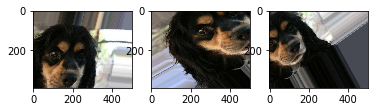

In [99]:
# Plot the generated images
dir_generated_imgs = dir_imgs + "img_generator/"
list_img = os.listdir(dir_generated_imgs)

fig = plt.figure()

fig.add_subplot(1, 3, 1)
img1 = mpimg.imread(dir_generated_imgs + list_img[random.randint(0, len(list_img))])
plt.imshow(img1)

fig.add_subplot(1, 3, 2)
img2 = mpimg.imread(dir_generated_imgs + list_img[random.randint(0, len(list_img))])
plt.imshow(img2)

fig.add_subplot(1, 3, 3)
img3 = mpimg.imread(dir_generated_imgs + list_img[random.randint(0, len(list_img))])
plt.imshow(img3)
